<a href="https://colab.research.google.com/github/cursosLabra/knowledge_graphs_definition_and_shapes/blob/main/Shaping_Knowledge_Graphs_with_Rudof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Knowledge Graphs: Definition and description

## Introduction

This document contains some examples for a talk about Knowledge Graphs, definition and description. The talk has been given by [Jose Emilio Labra Gayo](https://labra.weso.es/).

## Preliminaries: rudof library

The executable book is developed using [rudof](https://rudof-project.github.io/), an library that supports RDF data and RDF data shapes.

`rudof` is available as a [command line tool](https://rudof-project.github.io/rudof/overview.html) for which we provide [binaries in Windows, Linux and Mac](https://github.com/rudof-project/rudof/releases).

The library also contains Python bindings which are [publised in pypi](https://pypi.org/project/pyrudof/).

The documentation for the Python bindings is available [here](https://pyrudof.readthedocs.io/en/latest/).

In this Jupyter book we will be using Pyrudof, i.e. rudof with the Python bindings.

### Install and initialize pyrudof

The library is available as `pyrudof`.

In [1]:
!pip install pyrudof

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 12.6 MB/s eta 0:00:00


The main entry point if a class called `Rudof` through which most of the functionality is provided.

In [2]:
from pyrudof import Rudof, RudofConfig

In order to initialize that class, it is possible to pass a RudofConfig instance which contains configuration parameters for customization.

In [3]:
rudof = Rudof(RudofConfig())

### Cloning the github repository

We clone the github repo that contains the examples

In [4]:
!git clone https://github.com/cursosLabra/knowledge_graphs_definition_and_shapes.git

Cloning into 'knowledge_graphs_definition_and_shapes'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 44 (delta 21), reused 26 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (44/44), 66.81 KiB | 1.45 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [5]:
%cd knowledge_graphs_definition_and_shapes/examples

/content/knowledge_graphs_definition_and_shapes/examples


## RDF data

[RDF](https://www.w3.org/TR/rdf11-concepts/) is a W3C recommendation. There is currently a W3C working group which is defining [RDF 1.2](https://www.w3.org/TR/rdf12-concepts/).

We will define a small RDF model with information about Tim Berners-lee as:

In [6]:
rudof.read_data("timbl.ttl")

The RDF data can easily be merged with other data.

And the data can be serialized to different formats, like N-Triples or JSON-LD.

In [7]:
from pyrudof import RDFFormat

In [8]:
str = rudof.serialize_data(format=RDFFormat.NTriples)
print(str)

<http://example.org/CERN> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org/Organization> .
<http://example.org/timbl> <http://example.org/employer> <http://example.org/CERN> .
<http://example.org/timbl> <http://example.org/birthDate> "1955-06-08"^^<http://www.w3.org/2001/XMLSchema#date> .
<http://example.org/timbl> <http://example.org/birthPlace> <http://example.org/london> .
<http://example.org/timbl> <http://example.org/knows> _:1 .
<http://example.org/timbl> <http://www.w3.org/2000/01/rdf-schema#label> "Tim Berners-Lee" .
<http://example.org/timbl> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org/Human> .
<http://example.org/UK> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org/Country> .
<http://example.org/london> <http://example.org/country> <http://example.org/UK> .
<http://example.org/london> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org/Metropolis> .
<http://example.org/london> <http://www.w3

In [9]:
str = rudof.serialize_data(format=RDFFormat.RDFXML)
print(str)

<?xml version="1.0" encoding="UTF-8"?>
<rdf:RDF xmlns="http://example.org/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#" xmlns:xsd="http://www.w3.org/2001/XMLSchema#">
	<Organization rdf:about="http://example.org/CERN">
	</Organization>
	<rdf:Description rdf:about="http://example.org/timbl">
		<employer rdf:resource="http://example.org/CERN"/>
		<birthDate rdf:datatype="http://www.w3.org/2001/XMLSchema#date">1955-06-08</birthDate>
		<birthPlace rdf:resource="http://example.org/london"/>
		<knows rdf:nodeID="1"/>
		<rdfs:label>Tim Berners-Lee</rdfs:label>
		<rdf:type rdf:resource="http://example.org/Human"/>
	</rdf:Description>
	<Country rdf:about="http://example.org/UK">
	</Country>
	<rdf:Description rdf:about="http://example.org/london">
		<country rdf:resource="http://example.org/UK"/>
		<rdf:type rdf:resource="http://example.org/Metropolis"/>
		<rdf:type rdf:resource="http://example.org/City"/>
	</rdf:Description>
	<rdf:D

In [10]:
str = rudof.serialize_data(format=RDFFormat.JsonLd)
print(str)

[{"@id":"http://example.org/CERN","http://www.w3.org/1999/02/22-rdf-syntax-ns#type":[{"@id":"http://example.org/Organization"}]},{"@id":"http://example.org/timbl","http://example.org/employer":[{"@id":"http://example.org/CERN"}],"http://example.org/birthDate":[{"@type":"http://www.w3.org/2001/XMLSchema#date","@value":"1955-06-08"}],"http://example.org/birthPlace":[{"@id":"http://example.org/london"}],"http://example.org/knows":[{"@id":"_:1"}],"http://www.w3.org/2000/01/rdf-schema#label":[{"@value":"Tim Berners-Lee"}],"http://www.w3.org/1999/02/22-rdf-syntax-ns#type":[{"@id":"http://example.org/Human"}]},{"@id":"http://example.org/UK","http://www.w3.org/1999/02/22-rdf-syntax-ns#type":[{"@id":"http://example.org/Country"}]},{"@id":"http://example.org/london","http://example.org/country":[{"@id":"http://example.org/UK"}],"http://www.w3.org/1999/02/22-rdf-syntax-ns#type":[{"@id":"http://example.org/Metropolis"},{"@id":"http://example.org/City"}]},{"@id":"_:1","http://example.org/birthPlace

In [11]:
str = rudof.serialize_data(format=RDFFormat.Turtle)
print(str)

@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix : <http://example.org/> .
:CERN a :Organization .
:timbl :employer :CERN ;
	:birthDate "1955-06-08"^^xsd:date ;
	:birthPlace :london ;
	:knows _:1 ;
	rdfs:label "Tim Berners-Lee" ;
	a :Human .
:UK a :Country .
:london :country :UK ;
	a :Metropolis , :City .
_:1 :birthPlace :Spain .



## Running SPARQL queries

In [12]:
rudof.read_query("timbl.sparql")


In [13]:
results = rudof.run_current_query_select()

Show the results:

In [14]:
for result in iter(results):
    print(result.show())

?person -> <http://example.org/timbl>
?date -> "1955-06-08"^^<http://www.w3.org/2001/XMLSchema#date>
?country -> <http://example.org/UK>



## Visualizing RDF

rudof is able to generate visualizations of RDF graphs. In order to generate visualizations, rudof leverages on plantuml, so it generates a file in plantuml syntax that can be used to generate a picture in SVG, PNG, etc.

In [15]:
! pip install plantuml

In [16]:
! pip install ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.8 MB/s eta 0:00:00


In [17]:
uml = rudof.data2plantuml_file('out.puml')

In [18]:
!python -m plantuml out.puml

[{'filename': 'out.puml', 'gen_success': True}]


In [19]:
from IPython.display import Image

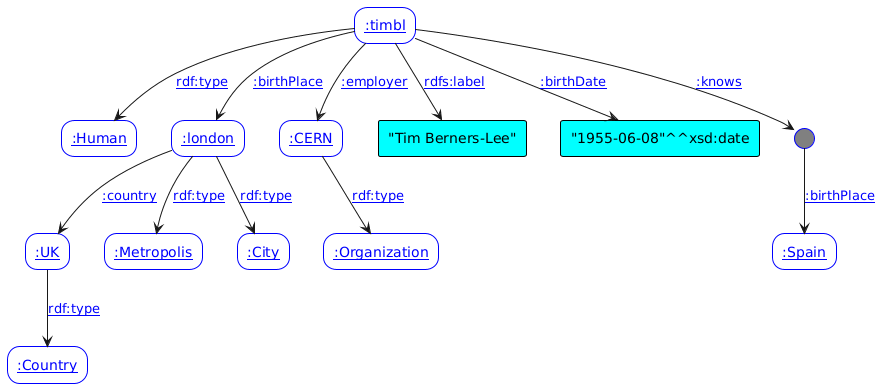

In [20]:
Image(f"out.png")

## Working with SPARQL endpoints

It is also possible to work with SPARQL endpoints, which can also be merged with the current RDF data

In [21]:
rudof.add_endpoint("https://query.wikidata.org/sparql")

In [22]:
wikidata_query = """
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix wd: <http://www.wikidata.org/entity/>
prefix wdt: <http://www.wikidata.org/prop/direct/>


SELECT ?birthPlace ?birthDate ?birthPlaceLabel WHERE {
  wd:Q80 wdt:P19 ?birthPlace ;
         wdt:P569 ?birthDate ;
         rdfs:label ?personLabel .
  ?birthPlace rdfs:label ?birthPlaceLabel .
  FILTER(
    lang(?personLabel) = "en" &&
    lang(?birthPlaceLabel) = "en"
  )
}
"""


In [23]:
results = rudof.run_query_str(wikidata_query)

In [24]:
for result in iter(results):
    print(result.show())

?birthPlace -> <http://www.wikidata.org/entity/Q84>
?birthDate -> "1955-06-08T00:00:00Z"^^<http://www.w3.org/2001/XMLSchema#dateTime>
?birthPlaceLabel -> "London"@en



## Validate using ShEx

The next command is just to clean the RDF data for the next examples.

In [25]:
rudof.reset_all()

In [26]:
rudof.read_shex("researcher.shex")


We can read some RDF data

In [27]:
rudof.read_data("timbl.ttl")

In ShEx, a shapemap can be used to associate target nodes with shapes to check if they conform.

In [28]:
rudof.read_shapemap("timbl.shapemap")

Once the ShEx schema and the Shapemap have been added to `rudof`, it is possible to validate the current RDF data with the `validate_shex()` method:

In [29]:
result = rudof.validate_shex()

`validate_shex()` returns a `ResultShapeMap` object which contains a `show()` method to show the results of the validation:

In [30]:
print(result.show())

:timbl@<http://example.org/Researcher> -> OK, reason: Reason #Shape passed. Node http://example.org/timbl, shape: Shape  Preds: http://www.w3.org/2000/01/rdf-schema#label,http://example.org/birthPlace,http://example.org/birthDate,http://example.org/employer
RBE: C0{1, 1};C1?;C2?;C3*;
Keys:
 http://www.w3.org/2000/01/rdf-schema#label -> [ C0 ]
 http://example.org/birthPlace -> [ C1 ]
 http://example.org/birthDate -> [ C2 ]
 http://example.org/employer -> [ C3 ]
Components:
 C0 -> http://www.w3.org/2000/01/rdf-schema#label datatype(http://www.w3.org/2001/XMLSchema#string)
 C1 -> http://example.org/birthPlace @1
 C2 -> http://example.org/birthDate datatype(http://www.w3.org/2001/XMLSchema#date)
 C3 -> http://example.org/employer @2

: 0



We reset the status of the `ShEx` schema, the `Shapemap` and the current `RDF data` for the next section.

## Validate using SHACL

First we reset the status of rudof using `rudof.reset_all()`

In [31]:
# @title
rudof.reset_all()

Let's read some RDF data.

In [32]:
rudof.read_data("timbl.ttl")

In [33]:
rudof.read_shacl("timbl_shapes.ttl")

ValueError: Reading SHACL shapes graph. Parsing timbl_shapes.ttl: Url parsing error for :timbl_shapes.ttl relative URL without a base

In [ ]:
result = rudof.validate_shacl()

In [ ]:
print(result.show())

## Converting ShEx to UML

`rudof` can be used to convert ShEx to diagrams in UML-like style. The converter generates a [PlantUML](https://plantuml.com/) string which can be written to a file and converted to an image using the PlantUML tool.

In [ ]:
from pyrudof import UmlGenerationMode

In [ ]:
rudof.read_shex_str("""
prefix : <http://example.org/>
prefix xsd:    <http://www.w3.org/2001/XMLSchema#>

:Person {
 :name     xsd:string    ;
 :age      xsd:integer * ;
 :worksFor @:Company     ;
 :address  @:Address     ;
 :knows    @:Person      ;
}

:Company {
  :name xsd:string     ;
  :code xsd:integer    ;
}

:Address {
  :street     xsd:string   ;
  :country    @:Country    ;
  :postalCode xsd:string   ;
}

:Country {
  :name xsd:string ;
}
""")

In [ ]:
plant_uml = rudof.shex2plantuml_file(UmlGenerationMode(), 'out.puml')

Now we install the PlantUML tools necessary to process the generated `plant_uml`

In [ ]:
! pip install plantuml

In [ ]:
! pip install ipython

In [ ]:
!python -m plantuml out.puml

In [ ]:
from IPython.display import Image

In [ ]:
Image(f"out.png")

In [ ]:
rudof.reset_all()

## Converting DCTAP to ShEx

Rudof can be used to convert [DCTAP](https://www.dublincore.org/specifications/dctap/) files to ShEx.

DCTAP can be used to represent shapes using a tabular representation using CSV or an spreadsheet format like XLSX. As an example, the following CSV data:


In [ ]:
dctap_str = """shapeId,propertyId,Mandatory,Repeatable,valueDatatype,valueShape
Person,name,true,false,xsd:string,
,birthdate,false,false,xsd:date,
,worksFor,false,true,,Company
Company,name,true,false,xsd:string,
,employee,false,true,,Person
"""

In [ ]:
rudof.read_dctap_str(dctap_str)

In [ ]:
dctap = rudof.get_dctap()

In [ ]:
print(dctap)

It is possible to convert the DCTAP obtained to ShEx

In [ ]:
rudof.dctap2shex()


In [ ]:
from pyrudof import ShExFormatter

In [ ]:
shex = rudof.get_shex()

result = rudof.serialize_shex(shex, ShExFormatter())


In [ ]:
print(result)

# Support for RDF 1.2

## RDF 1.2 data

Reset previous state of `rudof` and remnove the temporary file `out.puml` if it exists.

In [ ]:
# @title
rudof.reset_all()

In [ ]:
# @title
!rm -f out.puml out.pnf

Rudof has added support for [RDF 1.2](https://www.w3.org/TR/rdf12-primer). It is possible, for example, to load some RDF 1.2 files and visualize them.


RDF 1.2 introduces [triple terms](https://www.w3.org/TR/rdf12-primer/#section-triple-terms) which denote statements that can be the object of some triples.

In [ ]:
rudof.read_data_str("""
prefix :     <http://example.org/>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix xsd:  <http://www.w3.org/2001/XMLSchema#>
prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

:timbl rdfs:label "Tim Berners Lee" ;
       :employer :CERN {| :start "1984" ;
                          :end   "1994" |}
                       {| :start "1980" ;
                          :end   "1980" |} ;
       :award :PA {| :time "2002" ;
                     :togetherWith :vint |} .
:vint  rdfs:label "Vinton Cerf" .
""")


## Querying RDF 1.2

In [ ]:
rudof.read_query_str("""
prefix :     <http://example.org/>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix xsd:  <http://www.w3.org/2001/XMLSchema#>
prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT DISTINCT ?person ?employer ?start ?end ?timeAward ?togetherWith WHERE {
  ?person :employer ?employer ;
          :award ?award .
  BIND( TRIPLE( ?person, :employer, ?employer ) AS ?triple_employer )
  BIND( TRIPLE( ?person, :award, ?award ) AS ?triple_award )
  ?reifier1 rdf:reifies ?triple_employer ;
           :start ?start ;
           :end ?end .
  ?reifier2 rdf:reifies ?triple_award ;
           :time         ?timeAward ;
           :togetherWith ?togetherWith .
}
""")

In [ ]:
results = rudof.run_current_query_select()

In [ ]:
for result in iter(results):
    print(result.show())

## Visualizing RDF 1.2 graphs

rudof has added preliminary support to visualize RDF 1.2 graphs. One problem with the visualization is how to represent reified triples. In rudof they are represented by a circle with 3 edges (subject, predicate and object). This representation allows to have links to any of them.

In [ ]:
uml = rudof.data2plantuml_file('out.puml')

Convert the `puml` to an image.

In [ ]:
!python -m plantuml out.puml

In [ ]:
Image(f"out.png")

In [RDF 1.2 turtle syntax](https://www.w3.org/TR/rdf12-turtle/), there are several possibilities to define triple terms.



### Declaring triple terms directly

In [ ]:
!rm -f out.puml out.pnf
rudof.reset_all()

A triple term can be declared enclosing it between `<<(` and `)>>`. For example:

In [ ]:
rudof.read_data_str("""
PREFIX :    <http://www.example.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

_:e38  :familyName                     "Smith" .
_:anno rdf:reifies <<( _:e38 :jobTitle "Designer" )>> .
_:anno :accordingTo                     :eric .
 """)

In [ ]:
uml = rudof.data2plantuml_file('out.puml')

In [ ]:
!python -m plantuml out.puml

In [ ]:
Image(f"out.png")

### Reifying triples

In [ ]:
!rm -f out.puml out.pnf
rudof.reset_all()

Enclosing a triple between `<<` and `>>`, is a syntactic sugar that declares that there is a reifier whose object is that triple and that can be used to add more declarations about that reifier.

For example:

In [ ]:
rudof.read_data_str("""
 PREFIX :    <http://www.example.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

:employee38 :familyName "Smith" .
<< :employee38 :jobTitle "Assistant Designer" >> :accordingTo :employee22 .
 """)

In [ ]:
uml = rudof.data2plantuml_file('out.puml')
!python -m plantuml out.puml
Image(f"out.png")

### Annotation syntax

In [ ]:
# Clean the workspace
!rm -f out.puml out.pnf
rudof.reset_all()

It is also possible to use the annotation syntax where a statement can be annotated with `{|` and `|}` as follows:


In [ ]:
rudof.read_data_str("""
 PREFIX : <http://example.com/>
 PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
 :alice :name "Alice" ~ :t {|
   :statedBy :bob ;
   :recorded "2021-07-07"^^xsd:date
 |} .
 """)

In [ ]:
uml = rudof.data2plantuml_file('out.puml')
!python -m plantuml out.puml
Image(f"out.png")

Notice that in the visualization, we differentiate between a statement that is part of the graph which is represented by a box from a statement that is not part of the graph, which is represented by a cloud symbol.